In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.groupby('Species').mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.006,3.418,1.464,0.244
Iris-versicolor,75.5,5.936,2.770,4.260,1.326
Iris-virginica,125.5,6.588,2.974,5.552,2.026


In [6]:
X = df.iloc[: , 1:5].values
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
# Elbow Plot
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i , init = 'k-means++' , max_iter= 100 , n_init= 10 , random_state= 1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

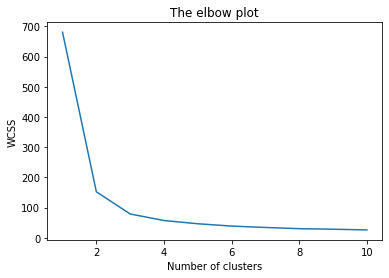

In [8]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

**No. of clusters = 3**

In [9]:
# Applying kmeans with no. of clusters = 3

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)
y_kmeans = kmeans.fit_predict(X)

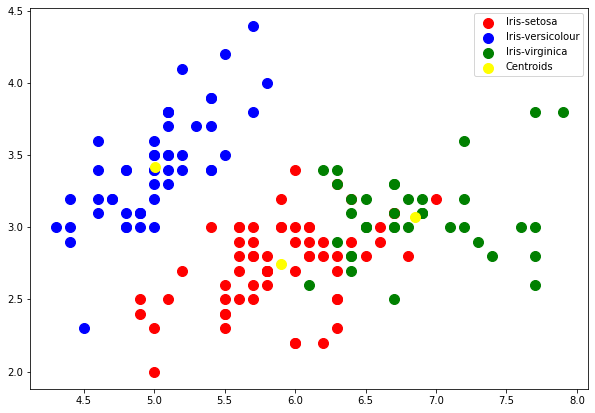

In [10]:
#Visualising the clusters
plt.figure(figsize= (10,7))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
#X[y_kmeans == 0, 0] selects the elements of X where the corresponding y_kmeans value is 0 and the second dimension is 0
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [11]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [12]:
df['Cluster no.'] = y_kmeans
df.drop(['Id'], axis = 1 , inplace = True)

In [13]:
df.groupby('Cluster no.').mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Cluster no.,,,,
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.418000,1.464000,0.244000
2,6.850000,3.073684,5.742105,2.071053


# Decision Tree Classifier

In [14]:
df2 = df.drop(['Cluster no.'] , axis = 1)
#df2 = df.copy()
df2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
label = LabelEncoder()

In [17]:
df2['Species'] = label.fit_transform(df2['Species'])

In [18]:
df2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
df2.Species.unique()

array([0, 1, 2])

In [20]:
X = df2.iloc[: , :-1]
y = df2.iloc[: ,-1]

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scale = StandardScaler()

In [23]:
X = scale.fit_transform(X)

In [24]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.20 , random_state = 1)

In [25]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [26]:
clf = DecisionTreeClassifier()
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)

In [27]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

In [28]:
accuracy_score(y_test , y_pred)

0.9666666666666667

In [29]:
print('Accuracy Score : ' , accuracy_score(y_test , y_pred))
print('-'*50)
print('Confusion Matrix: \n' , confusion_matrix(y_test , y_pred))
print('-'*50)
print('Classification Report: \n' , classification_report(y_test , y_pred))

Accuracy Score :  0.9666666666666667
--------------------------------------------------
Confusion Matrix: 
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
--------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [30]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

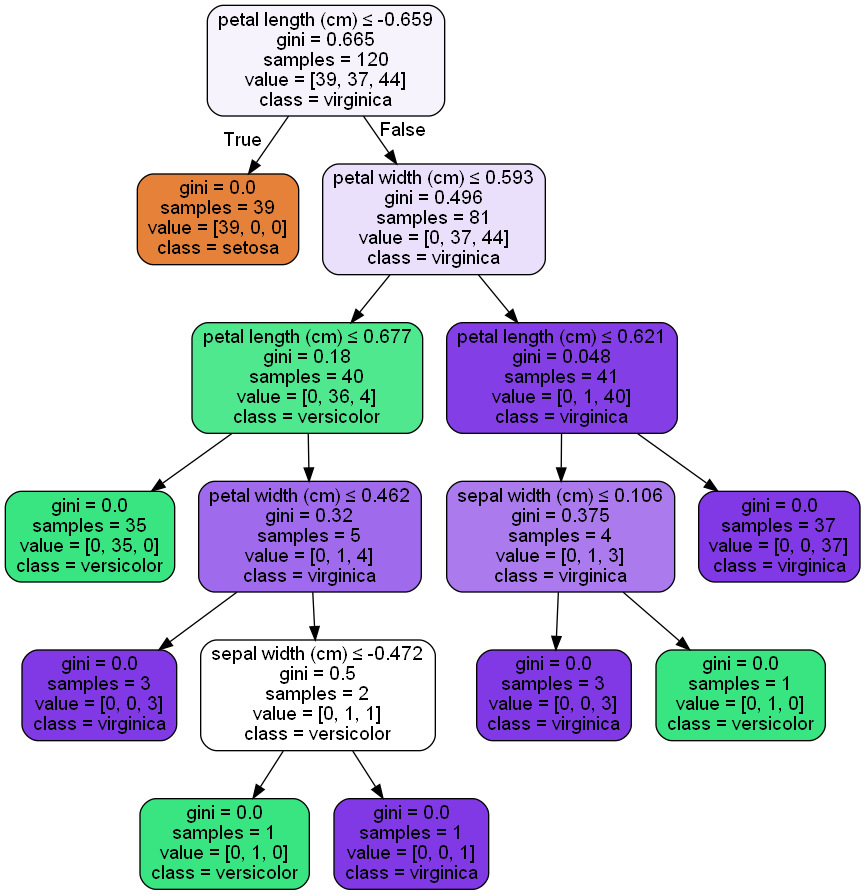

In [31]:
# Printing tree alongwith class names
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True , \
                feature_names= ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ,\
               class_names= ['setosa', 'versicolor', 'virginica'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())